# Overview

This section provides an overview of the `aperiodic methods` project as a whole.

The `aperiodic methods` project is an investigation and comparison of methods that can be used to measure aperiodic activity. 

Various conceptual and methodological approaches have been taken to investigate the "structure" of electrophysiological data. This includes various methods and approaches for investigating "aperiodic" activity, by which we mean activity that has no characteristic frequency. This contrasts with periodic activity, or neural oscillations, which have characteristic, repetitive structure.

In this project, we take a general approach to considering methods that "measure aperiodic activity", and include methods that explicitly measure specifically defined aperiodic components of the data (such as 1/f components), as well as potentially related methods that measure aspects of the "structure" of the data, (for example, complexity and entropy measures). While these methods have clearly distinct contexts and technical details, the extent to which they empirically relate to each other is under-investigated. Therefore, in this project, we attempt to systematically compare these methods, in practice, using simulated and empirical data.

## Contents

This section includes the following notebooks:
- `01-LiteratureSearch`: surveys the literature for the prevalence of methods related to measuring aperiodic activity
- `02-Simulations`: introduces and describes the simulations used in this study to evaluate and compare the methods

## Project Guide

This project is an investigation of available methods for investigating aperiodic neural activity.

### Tooling

The following tools are used in this project:

- [neurodsp](https://github.com/neurodsp-tools/neurodsp) is used for simulating data and applying DSP measures
- [specparam](https://github.com/fooof-tools/fooof) is used for simulating and parameterizing power spectra
- [antropy](https://github.com/raphaelvallat/antropy) is used for complexity and entropy measures
- [lisc](https://github.com/lisc-tools/lisc) is used for the literature analyses

## Aperiodic Activity

This section introduces basic concepts of aperiodic activity. 

In [1]:
# Import neurodsp functions for computing measures and plotting results
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from apm.sim.examples import TIMES, SIG_COMB
from apm.sim.settings import FS

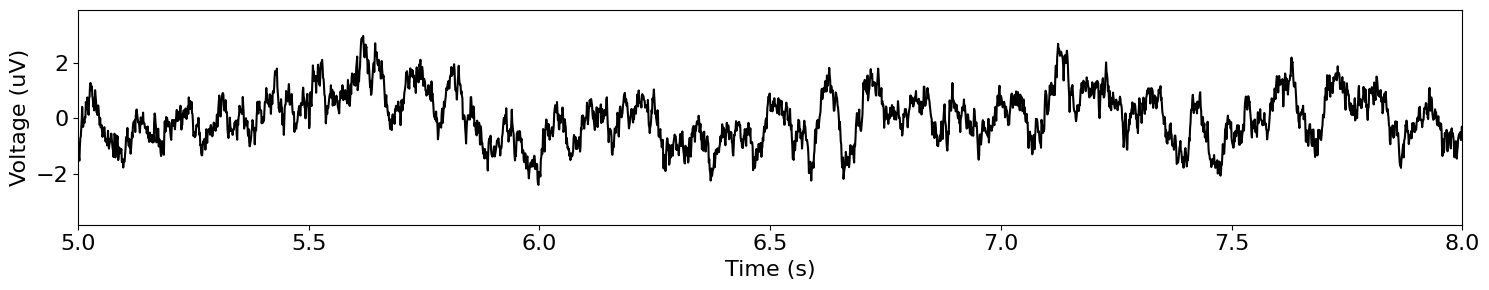

In [3]:
# Visualize a simulated neural time series
plot_time_series(TIMES, SIG_COMB, xlim=[5, 8])

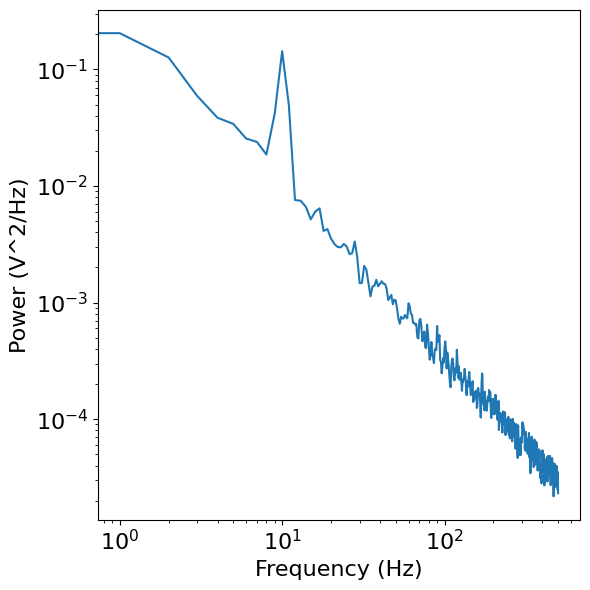

In [4]:
# Compute and visualize a power spectrum from the above signal
freqs, powers = compute_spectrum(SIG_COMB, FS)
plot_power_spectra(freqs, powers)

## SpecParam Demo

[SpecParam](https://fooof-tools.github.io/) is one of the methods that will be investigated in this project. SpecParam is a tool for parameterizing neural power spectra. 

Here we will briefly demonstrate applying spectral parameterization to an example spectrum, to demonstrate the different features of the data that we are interested in. 

In [5]:
# Import spectral parameterization code
from fooof import FOOOF
from fooof.plts.annotate import plot_annotated_model

/var/folders/59/8y2d5r257c77vzymnqs47x080000gn/T/ipykernel_56607/621020224.py:2: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [6]:
# Initialize and fit a spectral parameterization model
fm = FOOOF(peak_width_limits=[1, 8], min_peak_height=0.1, verbose=False)
fm.fit(freqs, powers, [1, 75])

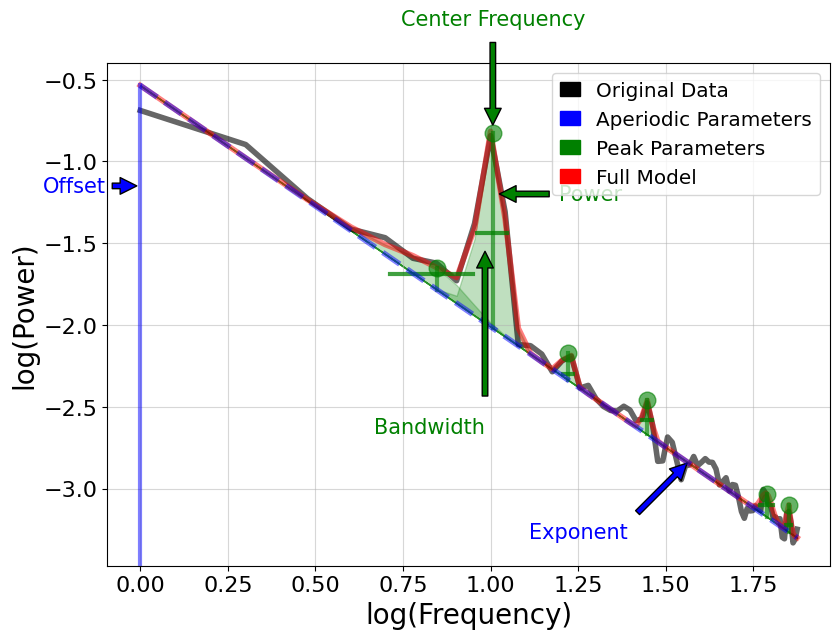

In [7]:
# Visualize an annoted model
plot_annotated_model(fm, True)